In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import math

import sklearn.linear_model as slmodel
from sklearn import datasets

### Так как ранее используемые данные о заболевших коронавирусом не особо ложились под линейную модель, решил взять стандартный sklearn-овский датасет Boston Housing

In [9]:
from sklearn.datasets import load_boston

In [10]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

***Сразу отберу только те переменные, по которым зависимость напоминает линейную***

In [15]:
boston['MEDV'] = boston_dataset.target

In [19]:
boston = boston[['RM', 'LSTAT', 'MEDV']]

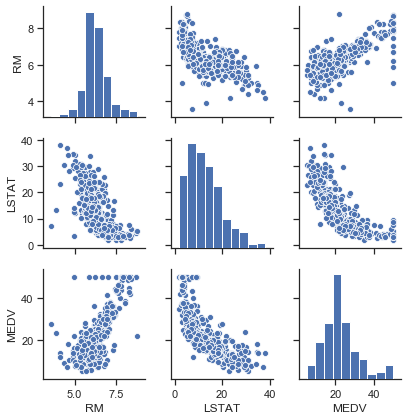

In [21]:
g=sns.pairplot(boston, height=2)

# ДЗ - 5 презентация

### Тест Бокса-Кокса

Выберем здесь в качестве $x$ только столбец $'RM'$ для простоты

In [43]:
y = boston['MEDV'].values
x = boston[['RM']].values

Преобразуем $y$ по методу Зарембки:

In [55]:
y_z = np.log(y)/np.exp((1/len(y))*np.sum(np.log(y)))

Метод: для каждого $\lambda$ от 0 до 1 выполняем преобразование Бокса-Кокса обеих переменных, строим по ним линейную модель и записываем найденную для неё сумму квадратов остатков, чтобы зайтем найти то $\lambda$, при котором эта сумма минимальна:

In [113]:
import statsmodels.api as sm
# Строим все модели методом МНК
errors = {}

for l in np.array(range(1, 101))/100:
    
    y_bc = (y_z**l - 1)/l
    x_bc = (x**l - 1)/l
    
    x_bc_ls = sm.add_constant(x_bc)
    model_bc = sm.OLS(y_bc,x_bc_ls).fit()
    
    err = np.sum((y_bc - (model_bc.params[1]*x_bc + model_bc.params[0]))**2)
    errors[err] = l

In [114]:
errors[np.min(list(errors.keys()))]

1.0

Как видим, минимальное значение RSS получилось при $\lambda = 1$, следовательно, здесь линейная модель лучше логарифмической

###  Тест Зарембки

Аналогично предыдущему методу, вычисляем преобразование Зарембки:

In [96]:
y_z = np.log(y)/np.exp((1/len(y))*np.sum(np.log(y)))

In [120]:
x_z = x
x_z_ls = sm.add_constant(x)

# Линейная модель
model_z_1 = sm.OLS(y_z,x_z_ls).fit()
# Логарифмическая модель
model_z_2 = sm.OLS(np.log(y_z),x_z_ls).fit()

Находим RSS обеих построенных моделей:

In [121]:
RSS_1 = np.sum((y_z - (model_z_1.params[1]*x_z + model_z_1.params[0]))**2)
RSS_2 = np.sum((np.log(y_z) - (model_z_2.params[1]*x_z + model_z_2.params[0]))**2)

In [122]:
print(RSS_1, RSS_2)

138.2245643987209 6995.486471647277


In [128]:
stat = 0.5*abs((np.log(RSS_1/RSS_2))) # исслудуемая статистика

In [129]:
stat > 0.04 # сравниваем со значением хи-квадрат с 1 степенью свободы

True

Получили, что наша статистика превосходит хи-квадрат (1), а значит гипотеза о том, что модели не имеют статзначимых различий отвергается. Выбираем гипотезу с меньшим RSS, т.е. снова линейную.

# ДЗ - 6 презентация

## 1.

Одним из ключевых инструментов государственной экономической политики является 
бюджетно-налоговая политика.
Рассмотрим бюджетно-налоговую (фискальную) политику: здесь в качестве основной переменной выступает 
непосредственно государственный бюджет. Очевидно, что бюджет растет с ростом поступлений, поэтому можно предположить
использование замещающей переменной - доходы госбюджета, которые состоят из налогов, акцизов, пошлин, доходов от собственности, фондов и т.п. Однако этот пример неудачный, поскольку бюджет также зависит и от расходов гос-ву, включающего трансферты, расходы на внешнюю полиьтику, оборонный комплекс и т.д.

## 2

Создадим дополнительный столбец, добавив небольшой шум к имеещемуся столбцу $'RM'$

In [156]:
boston['fakeRM'] = boston['RM'] +  np.random.normal(size=len(boston))*(boston['RM'].mean()/100)

C:\Users\Anatoliy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
boston.head()

,RM,LSTAT,MEDV,fakeRM
0,6.575,4.98,24.0,6.535587
1,6.421,9.14,21.6,6.421396
2,7.185,4.03,34.7,7.173241
3,6.998,2.94,33.4,6.931390
4,7.147,5.33,36.2,7.087378


In [165]:
y = boston['MEDV']
x = boston[['RM', 'LSTAT', 'fakeRM']]

In [161]:
#Линейная модель
model = slmodel.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
model.coef_ # Взглянем на коэфф-ты

array([ 6.96978747, -0.64189564, -1.87278229])

Коэффициент при $'fakeRM'$ имеет другой знак, нежели у $'RM'$, однако не зная заранее об их связи это вряд ли может послужить поводом посчитать эти переменные коллинеарными

In [171]:
np.linalg.det(np.dot(x.T,x))

1332971211.724506

Детерминант матрицы $ X^{\top}X $ не стремится к нулю, поэтому снова не можем выявить коллинеарность

In [167]:
x.corr()

,RM,LSTAT,fakeRM
RM,1.000000,-0.613808,0.995994
LSTAT,-0.613808,1.000000,-0.609790
fakeRM,0.995994,-0.609790,1.000000


Наконец по матрице корреляций видим очень большую корреляцию между $ 'RM' $ и $'fakeRM'$

Сравним коэффициенты детерминации для двух наборов объясняющих переменных - $(RM, LSTAT$) и $(fakeRM, LSTAT)$

In [278]:
#Линейная модель
y = boston[['MEDV']].values
x_1 = boston[['RM', 'LSTAT']].values
x_2 = boston[['fakeRM', 'LSTAT']].values

model_1 = slmodel.LinearRegression()
model_1.fit(x_1, y)

model_2 = slmodel.LinearRegression()
model_2.fit(x_2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [283]:
TSS = np.sum((y - y.mean())**2)
predict = model_1.coef_[0][0]* x_1[:,0] + model_1.coef_[0][1]* x_1[:,1] + model_1.intercept_[0]
RSS = np.sum((y - predict)**2)

R2_1 = 1 - (RSS/TSS) 

In [284]:
TSS = np.sum((y - y.mean())**2)
predict = model_2.coef_[0][0]* x_2[:,0] + model_2.coef_[0][1]* x_2[:,1] + model_2.intercept_[0]
RSS = np.sum((y - predict)**2)

R2_2 = 1 - (RSS/TSS) 

In [285]:
R2_1, R2_2

(-828.1121727677323, -827.0580073677846)

Для второй модели в данном случае коэфф-т детерминации больше, значит, оставляем переменные $(fakeRM, LSTAT)$

# ДЗ - 10 презентация

### Тест Уайта

In [288]:
del boston['fakeRM']

In [339]:
boston.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


Будем вновь рассматривать только зависимость $MEDV$ от $RM$

In [340]:
y = boston['MEDV'].values
x = boston[['RM']].values
model = slmodel.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Переменные вспомогательной регрессии - $RM$ и его квадраты. Таргет-переменная - квадраты ошибок

In [357]:
boston_w = boston.copy()
boston_w['errors'] = (boston_w['MEDV'] - (model.coef_[0] * boston_w['RM'] + model.intercept_))**2
boston_w['squares'] = boston_w['RM']**2
y = boston_w['errors']
boston_w = boston_w.drop(boston_w.columns[[2]], axis='columns')
X = sm.add_constant(boston_w)
X = X[['const', 'RM', 'squares']]

In [361]:
W = sm.OLS(y,X).fit()
W.rsquared # R^2 данной модели

0.08388289287514794

Используемая статистика: $n*R^2$

In [362]:
len(boston_w)*W.rsquared

42.44474379482486

Сравним это число с $\chi^2(1,\, 0.01) = 10.83$. Получили, что величина нашей статистики - больше, а значит отвергаем гомоскедатичность

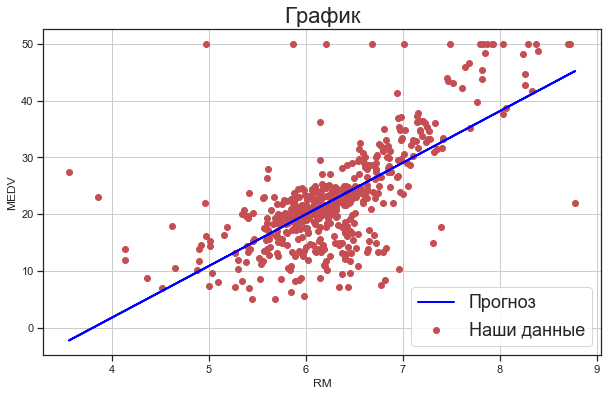

In [363]:
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(boston['RM'], boston['MEDV'], label='Наши данные',  lw=1.0, color = 'r')
plt.plot(boston['RM'], model.coef_[0] * boston['RM'] + model.intercept_, label='Прогноз', lw=2.0, color = 'blue')
plt.xlabel("RM", fontsize=12)
plt.ylabel("MEDV", fontsize=12)
plt.title('График', fontsize=22)
plt.legend(loc='best', frameon=True, fontsize=18) 
plt.grid()
plt.show()

В целом по графику видно, что рез-т адекватный и о гомоскедатичности говорить не приходится.

Найдем стандартную ошибку в форме Уайта, которая в данной модели является состоятельно (в отличие от стандартной оценки)по формуле:

$$ varHC = (X^{\top}X)^{-1}(X^{\top}VX)(X^{\top}X)^{-1} $$

In [370]:
X = boston['RM']
V = boston_w['errors']
varHC = (1/(X.transpose().dot(X)))**2*((X.transpose().dot(np.diag(V))).dot(X))
print(varHC)

0.002189560282326661
